## Context
A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.

## Data Description
7043 observations with 33 variables

 - CustomerID: A unique ID that identifies each customer.

 - Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

 - Country: The country of the customer’s primary residence.

 - State: The state of the customer’s primary residence.

 - City: The city of the customer’s primary residence.

 - Zip Code: The zip code of the customer’s primary residence.

 - Lat Long: The combined latitude and longitude of the customer’s primary residence.

 - Latitude: The latitude of the customer’s primary residence.

 - Longitude: The longitude of the customer’s primary residence.

 - Gender: The customer’s gender: Male, Female

 - Senior Citizen: Indicates if the customer is 65 or older: Yes, No

 - Partner: Indicate if the customer has a partner: Yes, No

 - Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

 - Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

 - Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

 - Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

 - Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

 - Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

 - Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

 - Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

 - Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

 - Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

 - Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

 - Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

 - Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

 - Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

 - Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

 - Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

 - Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

 - Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

 - Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

 - CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

 - Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

## Source
This dataset is detailed in:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx')

df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [ ]:
df['Total Charges'] = df['Total Charges'].astype(str).str.strip()

In [ ]:
df['Total Charges'] = df['Total Charges'].replace('nan', np.nan)
df['Total Charges'] = df['Total Charges'].replace('', np.nan)

In [ ]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [ ]:
df[['Tenure Months', 'Monthly Charges' ,'Total Charges']]

,Tenure Months,Monthly Charges,Total Charges
0,2,53.85,108.15
1,2,70.70,151.65
2,8,99.65,820.50
3,28,104.80,3046.05
4,49,103.70,5036.30
...,...,...,...
7038,72,21.15,1419.40
7039,24,84.80,1990.50
7040,72,103.20,7362.90
7041,11,29.60,346.45


In [ ]:
total_charges_null = df['Total Charges'].isnull()

In [ ]:
df.loc[total_charges_null, 'Total Charges'] = df.loc[total_charges_null, 'Monthly Charges']\
                                                * df.loc[total_charges_null, 'Tenure Months']

In [ ]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [ ]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

#### Handling missing values on Churn Label column
As we can observe that the null values are correspondent to the customers that didn't churn we will leave this data as null.

In [ ]:
df['Churn Value'].mean()

0.2653698707936959

In [ ]:
df['Monthly Charges'].median()

70.35

## EDA - Exploratory Data Analysis

In [ ]:
def count_plot(column,title):
    df[column].value_counts().plot(kind='bar')
    plt.title(title)

    labels = df[column].value_counts().index
    values = df[column].value_counts().values
    bars = plt.bar(labels, values)
    plt.bar_label(bars, padding=3, label_type='center', color='white', fontsize=10)

    plt.tight_layout()
    plt.show()

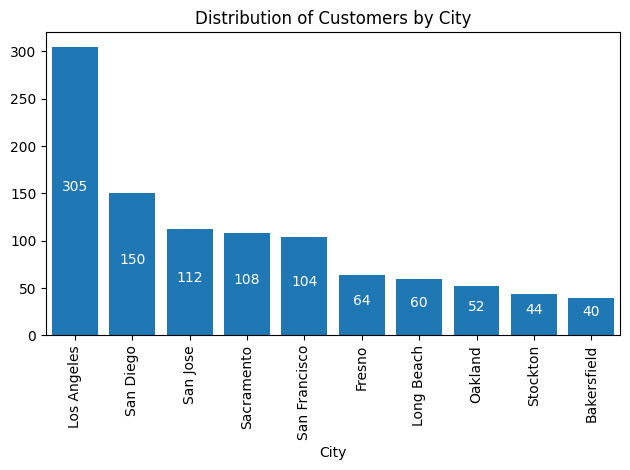

In [ ]:
df['City'].value_counts().head(10).plot(kind='bar')
plt.title('Distribution of Customers by City')

labels = df['City'].value_counts().index
values = df['City'].value_counts().values
bars = plt.bar(labels, values)
plt.bar_label(bars, padding=3, label_type='center',color='white', fontsize=10)

plt.tight_layout()
plt.show()

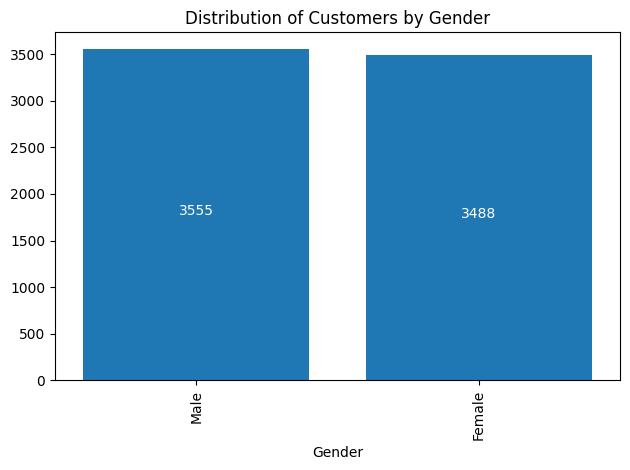

In [ ]:
count_plot('Gender','Distribution of Customers by Gender')

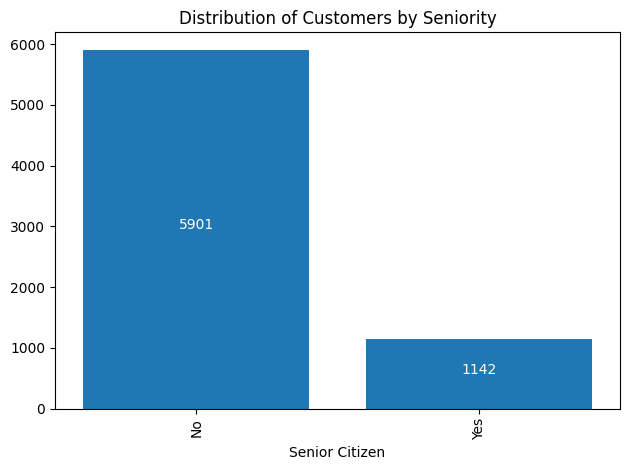

In [ ]:
count_plot('Senior Citizen', 'Distribution of Customers by Seniority')

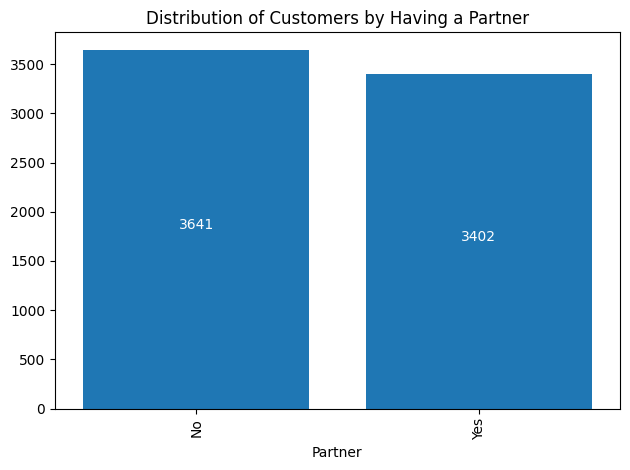

In [ ]:
count_plot('Partner', 'Distribution of Customers by Having a Partner')

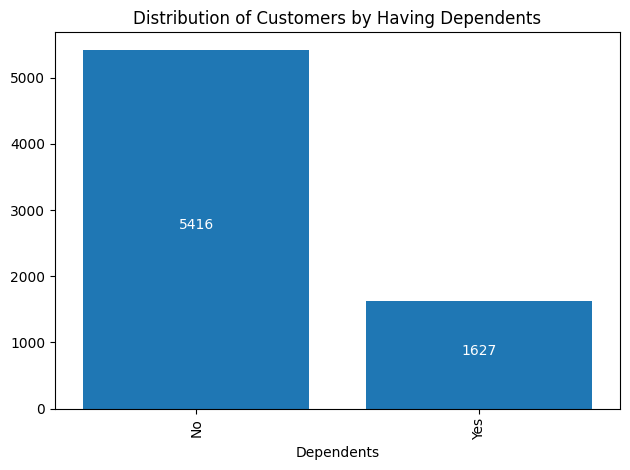

In [ ]:
count_plot('Dependents', 'Distribution of Customers by Having Dependents')

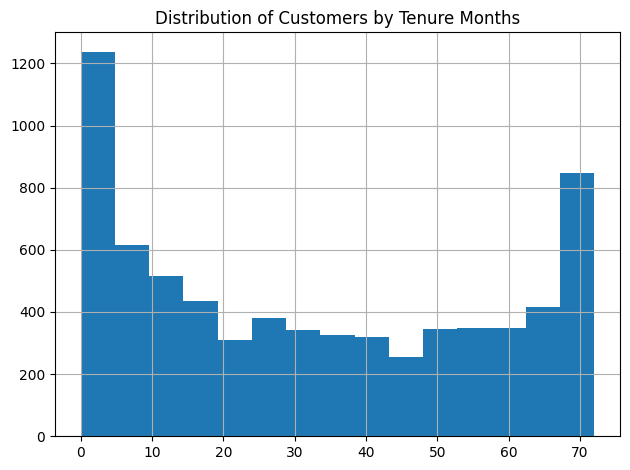

In [ ]:
df['Tenure Months'].hist(bins=15)
plt.title('Distribution of Customers by Tenure Months')

plt.tight_layout()
plt.show()

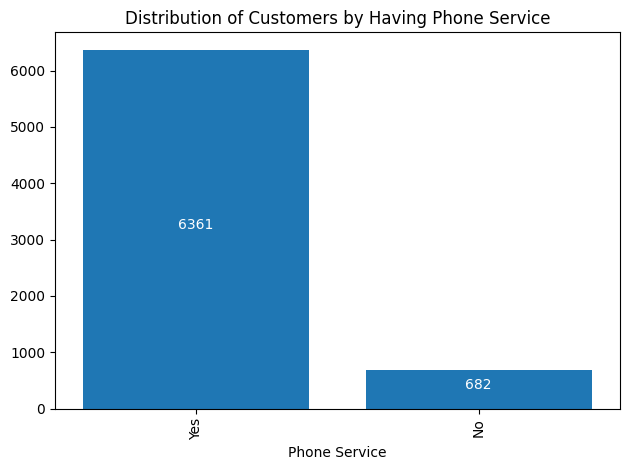

In [ ]:
count_plot('Phone Service', 'Distribution of Customers by Having Phone Service')

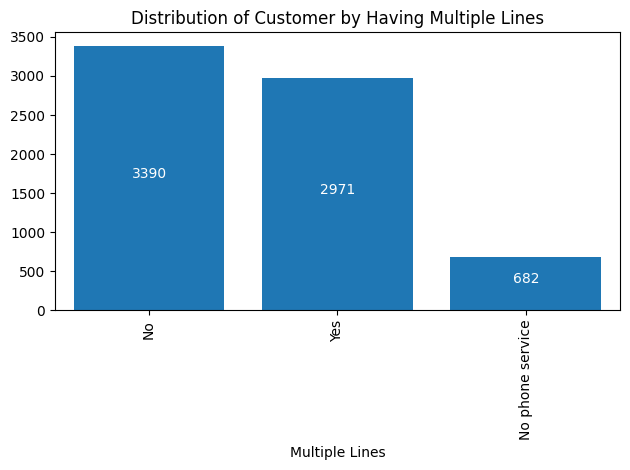

In [ ]:
count_plot('Multiple Lines', 'Distribution of Customer by Having Multiple Lines')

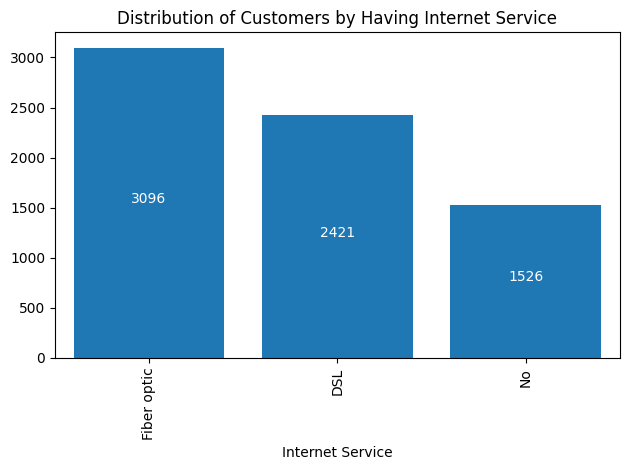

In [ ]:
count_plot('Internet Service', 'Distribution of Customers by Having Internet Service')

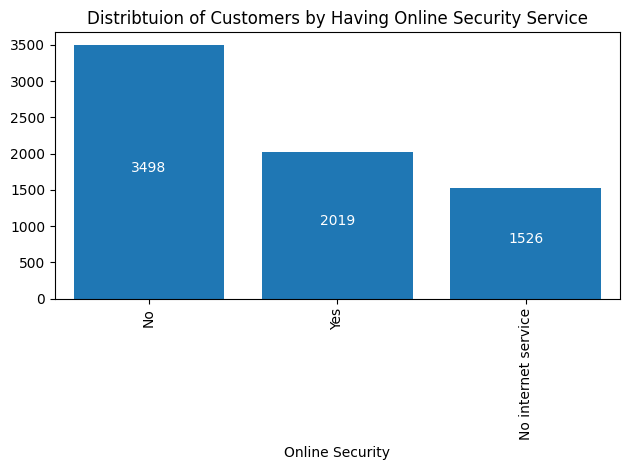

In [ ]:
count_plot('Online Security', 'Distribtuion of Customers by Having Online Security Service')

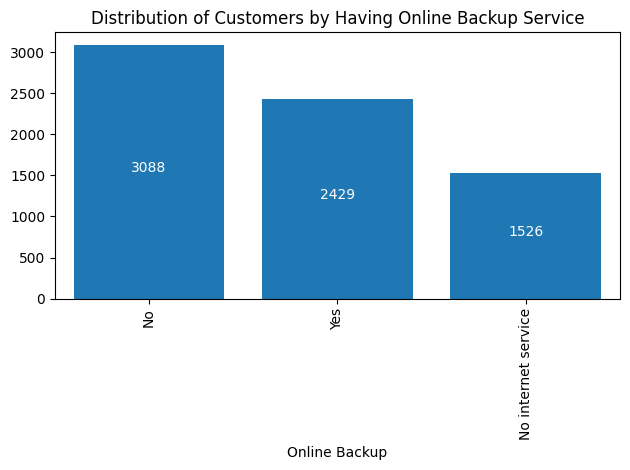

In [ ]:
count_plot('Online Backup', 'Distribution of Customers by Having Online Backup Service')

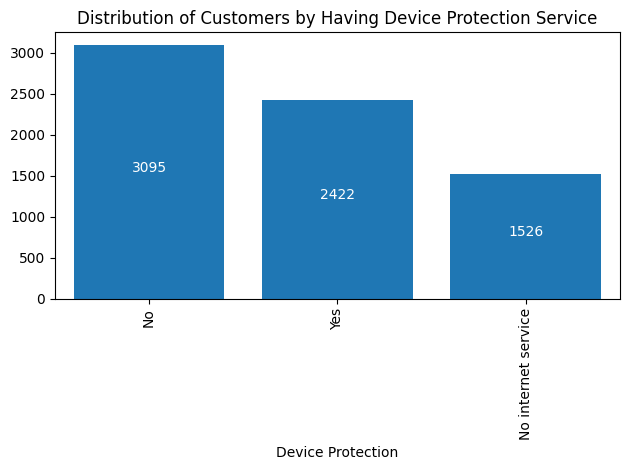

In [ ]:
count_plot('Device Protection', 'Distribution of Customers by Having Device Protection Service')

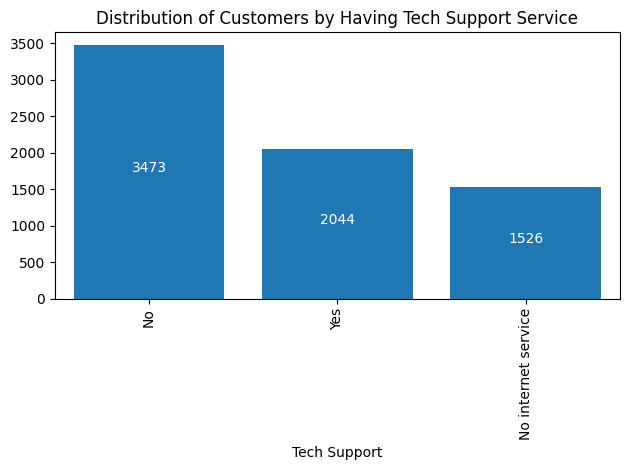

In [ ]:
count_plot('Tech Support', 'Distribution of Customers by Having Tech Support Service')

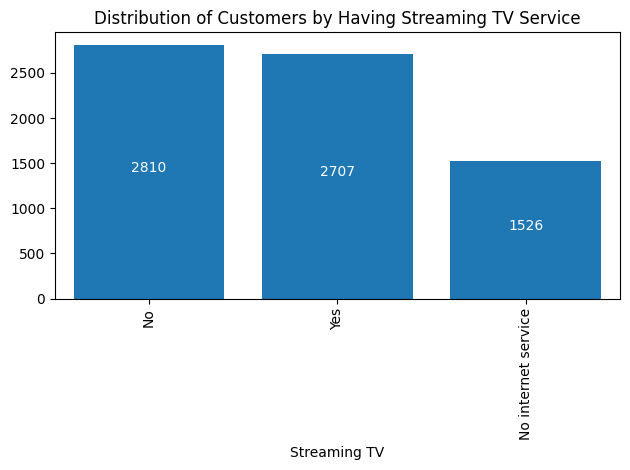

In [ ]:
count_plot('Streaming TV', 'Distribution of Customers by Having Streaming TV Service')

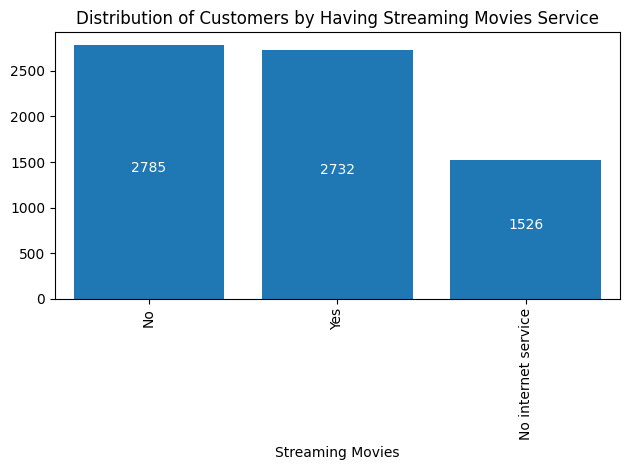

In [ ]:
count_plot('Streaming Movies', 'Distribution of Customers by Having Streaming Movies Service')

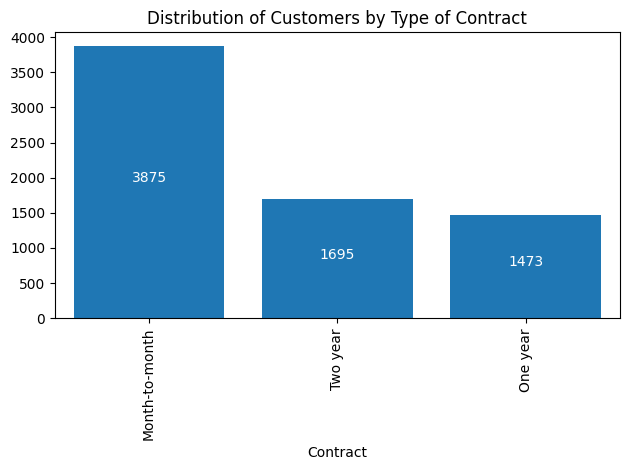

In [ ]:
count_plot('Contract', 'Distribution of Customers by Type of Contract')

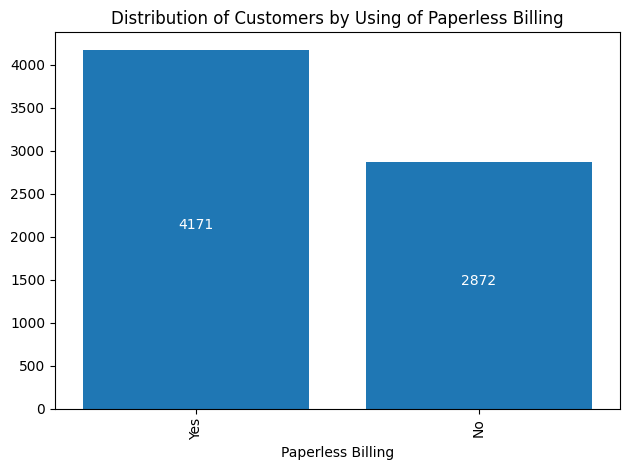

In [ ]:
count_plot('Paperless Billing', 'Distribution of Customers by Using of Paperless Billing')

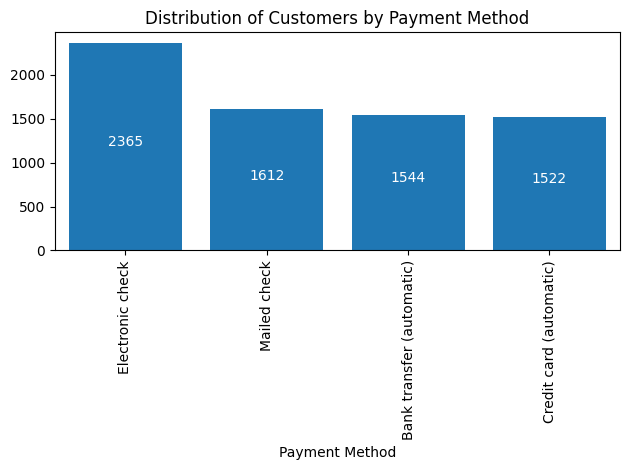

In [ ]:
count_plot('Payment Method', 'Distribution of Customers by Payment Method')

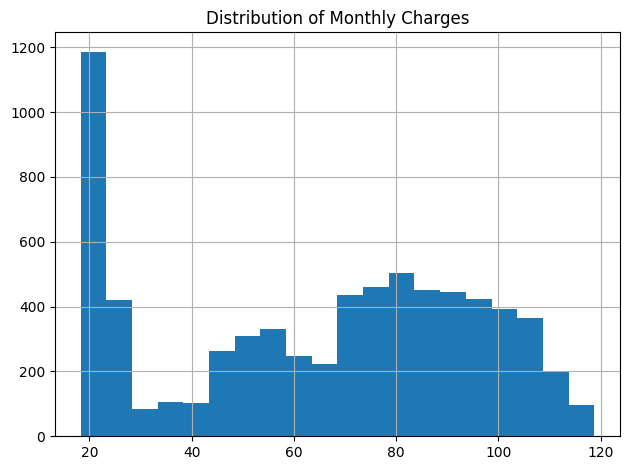

In [ ]:
df['Monthly Charges'].hist(bins=20)
plt.title('Distribution of Monthly Charges')

plt.tight_layout()
plt.show()

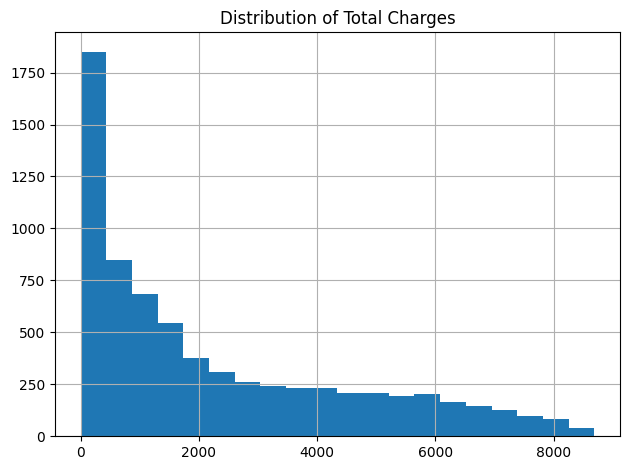

In [ ]:
df['Total Charges'].hist(bins=20)
plt.title('Distribution of Total Charges')

plt.tight_layout()
plt.show()

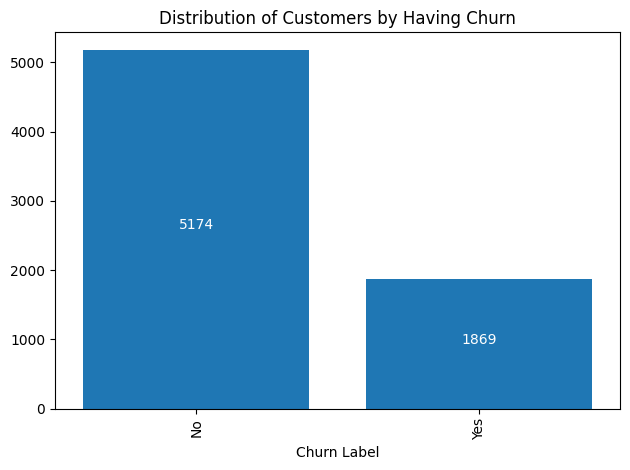

In [ ]:
count_plot('Churn Label', 'Distribution of Customers by Having Churn')

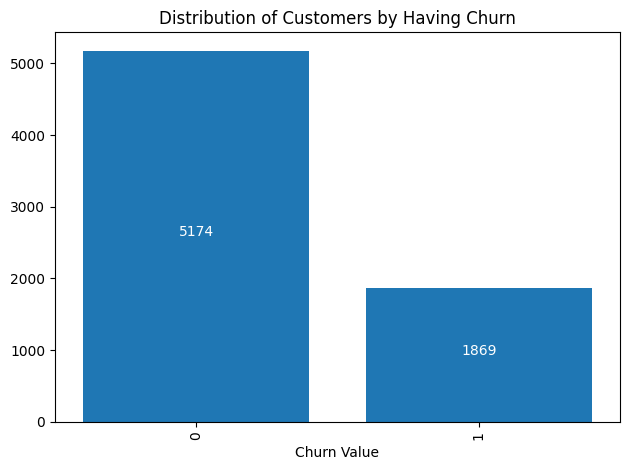

In [ ]:
count_plot('Churn Value', 'Distribution of Customers by Having Churn')

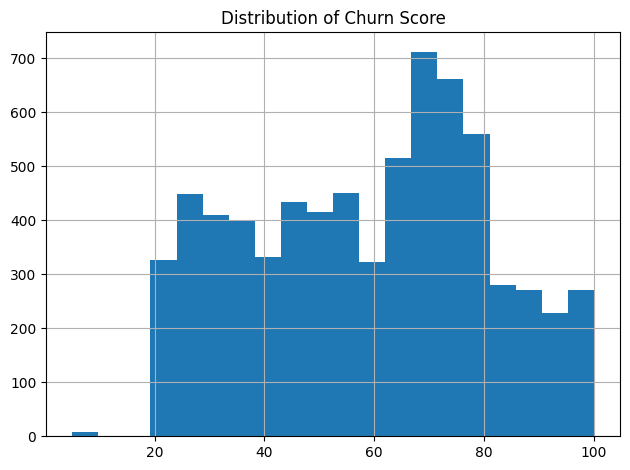

In [ ]:
df['Churn Score'].hist(bins=20)
plt.title('Distribution of Churn Score')

plt.tight_layout()
plt.show()

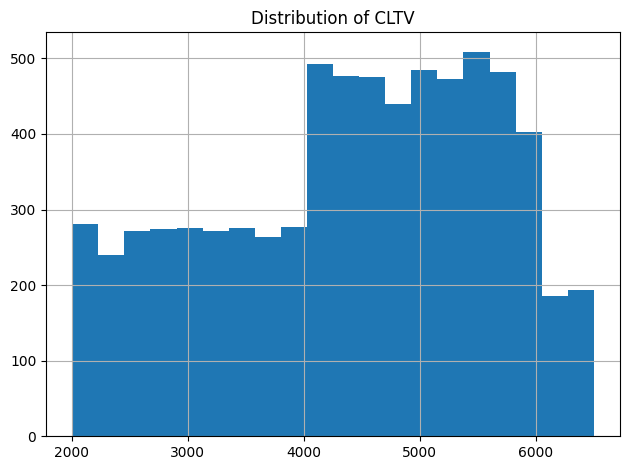

In [ ]:
df['CLTV'].hist(bins=20)
plt.title('Distribution of CLTV')

plt.tight_layout()
plt.show()

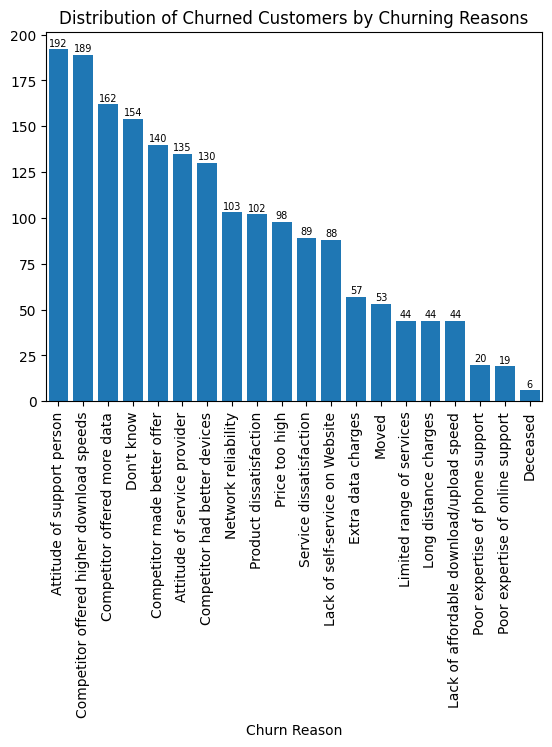

In [ ]:
df['Churn Reason'].value_counts().plot(kind='bar')
plt.title('Distribution of Churned Customers by Churning Reasons')

labels = df['Churn Reason'].value_counts().index
values = df['Churn Reason'].value_counts().values
bars = plt.bar(labels, values)
plt.bar_label(bars, padding=1, label_type='edge', color='black', fontsize=7)

plt.show()

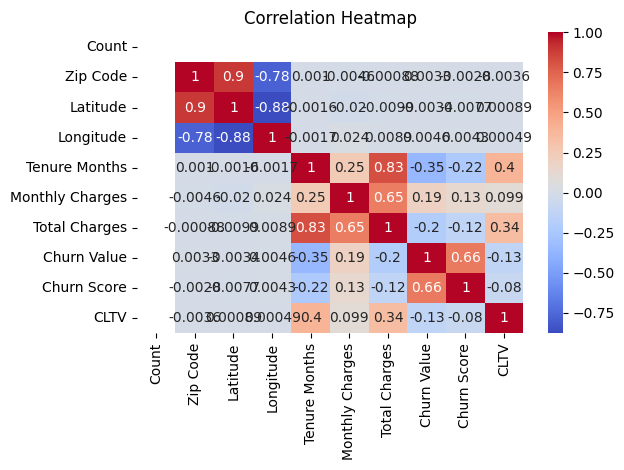

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

In [ ]:
df_churn = df[df['Churn Value'] == 1]

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: Monthly Charges, dtype: float64


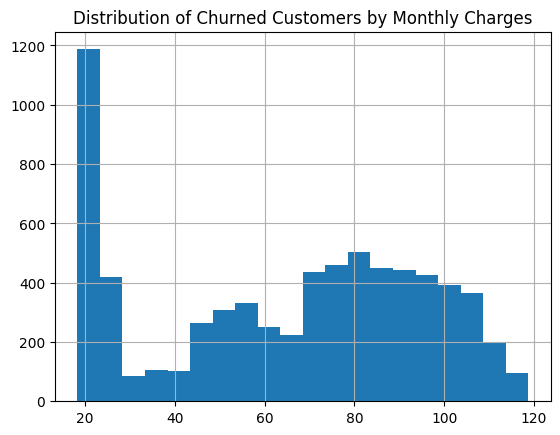

In [ ]:
print(df_churn['Monthly Charges'].describe())
df['Monthly Charges'].hist(bins=20)
plt.title('Distribution of Churned Customers by Monthly Charges')

plt.show()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: Tenure Months, dtype: float64


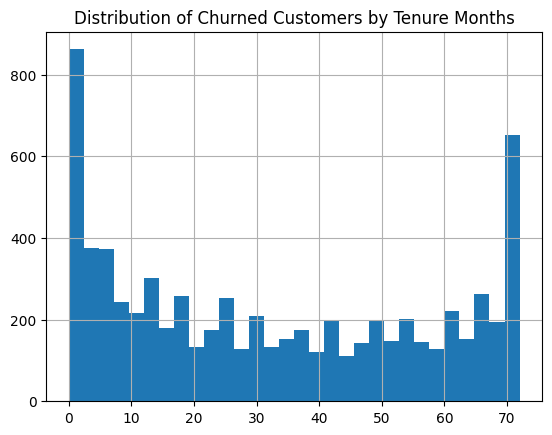

In [ ]:
print(df_churn['Tenure Months'].describe())
df['Tenure Months'].hist(bins=30)
plt.title('Distribution of Churned Customers by Tenure Months')

plt.show()

count    1869.000000
mean       82.510433
std        10.328570
min        65.000000
25%        74.000000
50%        82.000000
75%        91.000000
max       100.000000
Name: Churn Score, dtype: float64


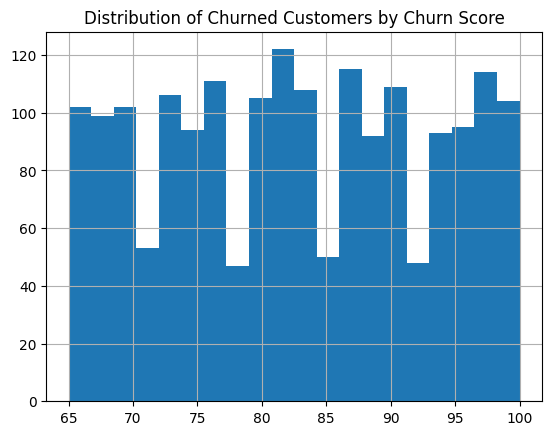

In [ ]:
print(df_churn['Churn Score'].describe())
df_churn['Churn Score'].hist(bins=20)

plt.title('Distribution of Churned Customers by Churn Score')

plt.show()

count    1869.000000
mean     4149.414660
std      1189.370707
min      2003.000000
25%      3101.000000
50%      4238.000000
75%      5166.000000
max      6484.000000
Name: CLTV, dtype: float64
CLTV of users that have tenure +70 months: 5005.0


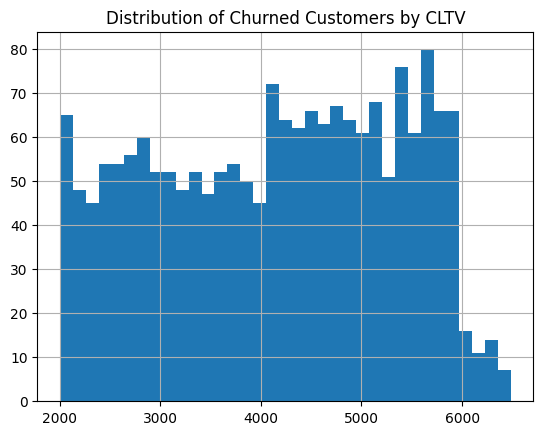

In [ ]:
print(df_churn['CLTV'].describe())
print('CLTV of users that have tenure +70 months: ' +  str(df_churn[df_churn['Tenure Months'] >= 70]['CLTV'].median()))
df_churn['CLTV'].hist(bins=35)

plt.title('Distribution of Churned Customers by CLTV')

plt.show()

## Feature Engineering

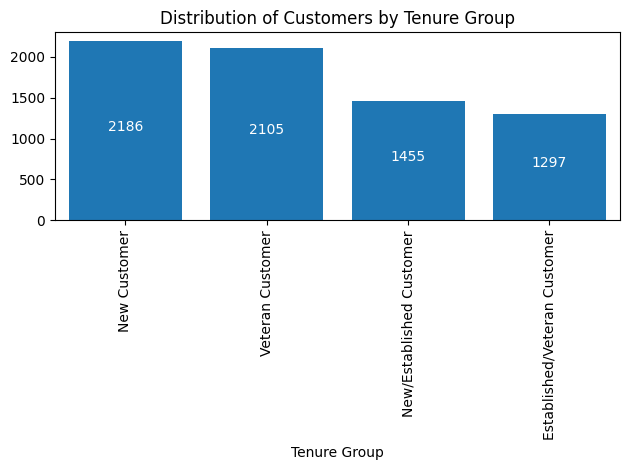

In [ ]:
bins = [0,12,30,50,df['Tenure Months'].max()]
labels = ['New Customer', 'New/Established Customer','Established/Veteran Customer', 'Veteran Customer']

df['Tenure Group'] = pd.cut(df['Tenure Months'], bins=bins, labels=labels, right=True, include_lowest=True)

count_plot('Tenure Group', 'Distribution of Customers by Tenure Group')

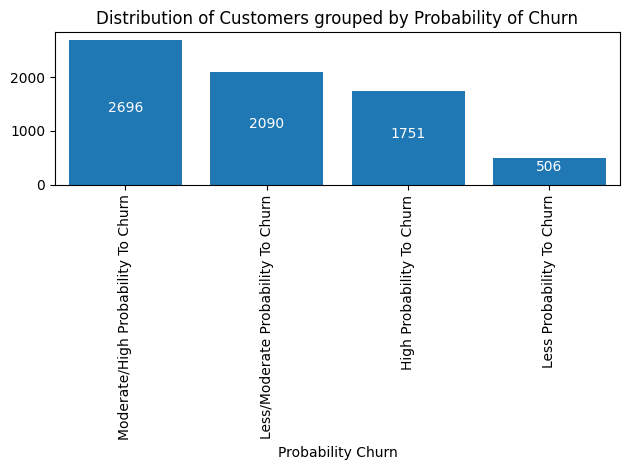

In [ ]:
bins = [0,25,50,75,100]
labels = ['Less Probability To Churn', 'Less/Moderate Probability To Churn',\
          'Moderate/High Probability To Churn', 'High Probability To Churn']

df['Probability Churn'] = pd.cut(df['Churn Score'], bins=bins,labels=labels, right=True, \
                                 include_lowest=True)

count_plot('Probability Churn', 'Distribution of Customers grouped by Probability of Churn')

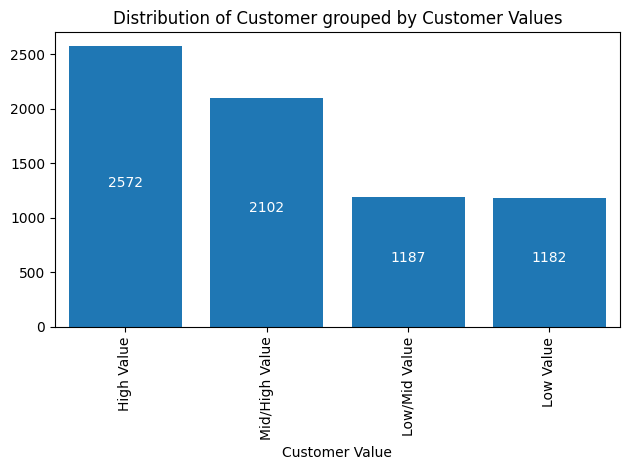

In [ ]:
bins = [0,3000,4000,5000,df['CLTV'].max()]
labels = ['Low Value', 'Low/Mid Value', 'Mid/High Value', 'High Value']

df['Customer Value'] = pd.cut(df['CLTV'], bins=bins, labels=labels, right=True, include_lowest=True)

count_plot('Customer Value', 'Distribution of Customer grouped by Customer Values')

### Hypothesis Testing

* **Null Hypothesis**: There is no difference in the distribution of contract types between customers who churn and customers who do not churn.

* **Alternative Hypothesis**: There is a statistically significant difference in the distribution of contract types between customers who churn and customers who do not churn.

#### Choice of the Hypothesis Test

Since we are examining the relationship between two categorical variables, and our hypothesis specifically addresses whether the distribution of one variable is independent of the other, we selected the **Chi-Squared Test of Independence**. This test is appropriate for determining whether there is a significant association between the categories of two variables.

In [ ]:
alpha = 0.05

df_hyp = pd.crosstab(df['Contract'], df['Churn Label'])

expected, observed, stats = pingouin.chi2_independence(data=df, x='Contract', y='Churn Label')

# check for the number of cells that have values less than 5
# if there are more than 20% of cells with values less than 5 we can't use the Chi-Squared Test of Independence
percent_cells_less_5 = (((df_hyp < 5).sum().sum()) / df_hyp.size) * 100

if percent_cells_less_5 <= 20:
    print('------Expected Frequencies------')
    print(expected)
    
    print('\n------Observed Frequencies------')
    print(observed)
    
    print('\n------Test Statisticsn Summary------')
    print(stats)
    
    pearson_p_val = stats[stats['test'] == 'pearson']['pval'].iloc[0]
    cramer = stats[stats['test'] == 'pearson']['cramer'].iloc[0]
    statistical_power = stats[stats['test'] == 'pearson']['power'].iloc[0]
    
    if pearson_p_val <= alpha:
        result = 'Reject Null Hypothesis'
        if cramer <= 0.10:
            cramer_result = 'Weak Association'
        elif cramer > 0.10 and cramer <= 0.30:
            cramer_result = 'Moderate Association'
        elif cramer > 0.30 and cramer <= 0.50:
            cramer_result = 'Strong Association'
        else:
            cramer_result = 'Very Strong Association'
    
        statistical_power_result = 1 - statistical_power
    
        print(f'\nThe p-val is {pearson_p_val}, so as it is less/equal than the significance level (alpha = {alpha}) we {result}')
        print(f'\nThe Cramer strenght on association is {cramer} so there is a {cramer_result} between Contract Type and Churn')
        print(f'\nThe statistical power is {statistical_power} so there is a {statistical_power_result}% chance of commiting a Type II error.')
        
    else:
        result = 'Fail to Reject the Null Hypothesis'
        print(f'\np-val = {pearson_p_val}, so as it it higher than the significance level (alpha = {alpha}) we {result}')

else:
    print(f'As there are {percent_cells_less_5}% cells with values less than 5 we can\'t use the Chi-Squared Test of Independence')

------Expected Frequencies------
Churn Label              No          Yes
Contract                                
Month-to-month  2846.691751  1028.308249
One year        1082.110180   390.889820
Two year        1245.198069   449.801931

------Observed Frequencies------
Churn Label       No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48

------Test Statisticsn Summary------
                 test    lambda         chi2  dof           pval    cramer  \
0             pearson  1.000000  1184.596572  2.0  5.863038e-258  0.410116   
1        cressie-read  0.666667  1228.067015  2.0  2.131258e-267  0.417573   
2      log-likelihood  0.000000  1386.809711  2.0  7.212696e-302  0.443741   
3       freeman-tukey -0.500000  1612.504845  2.0   0.000000e+00  0.478489   
4  mod-log-likelihood -1.000000  2014.334217  2.0   0.000000e+00  0.534794   
5              neyman -2.000000  4219.041537  2.0   0.000000e+00  0.773977   

   power

### Conclusion – Key Customer Insights

Based on the analysis, we observe the following characteristics across the customer base:
* **Churn Rate**: Approximately **26% of customers have churned**, 74% remain active.
* **Billing**:
  * The **median monthly** charge is `$70.35`.
  * 50% of customers pay between `$35.50` and `$89.85`, with total charges ranging from `$0.00` to `$8,684.80`.
* **Demographics & Geography**:
  * **Los Angeles** has the **highest number of customers**\.
  * **Gender distribution** is nearly equal.
  * Most customers are **under 65 years** old.
  * Roughly **equal proportions have or do not have a partner**\.
  * Most customers **have no dependents**\.
* **Tenure & Contracts**:
  * A significant number of customers have **either <12 months or >50 months of tenure**\.
  * Majority are on **Month-to-Month contracts**, with **paperless billing** as the preferred billing method.
* **Services**:
  * Most customers **have a phone service**; however, the **distribution between single vs. multiple lines is balanced**\.
  * The **Fiber Optic Internet** is the most commonly used internet type.
* **Among internet users**:
  * Majority do **not subscribe to Online Security or Tech Support** services.
  * More customers **have Online Backup and Device Protection** than other add-ons, though **adoption is still low**\.
  * For **Streaming TV and Movies**, adoption is **nearly 50/50**\.
* **Payment Methods**:
  * **Electronic Check** is the most used payment method; other methods are similarly distributed.
* **Customer Value & Risk Segments**:
  * A **significant proportion** of customers are classified as **high-value or moderate-to-high value**\.
  * There are **more customers with moderate/high churn risk** than low-risk ones.

### Churn Insights – Drivers and Patterns

From deeper churn analysis, we identified these contributing factors:
* **Contract Tenure**:
  * Churn is notably **higher among customers with <5 months or >70 months of tenure**\.
  * Customers on **Month-to-Month contracts** are at significantly **higher churn risk**\.
* **Pricing Sensitivity**:
  * Churned customers often **fall into two pricing clusters**:
    * **Low**: around `$20`/month
    * **High**: around `$79`/month
* **Behavioral Scores**:
  * **Average churn score** for churned customers is **~82** (on a 100-point scale).
  * Their **average Customer Lifetime Value (CLTV)** is approximately `$4,238`, indicating a meaningful revenue impact.
* **Top Churn Reasons** (from feedback analysis):
  * **Support quality issues**, especially related to staff attitude.
  * **Competitors offering better** internet speeds and benefits.

### Hypothesis Test Results

* **Null Hypothesis**: There is no difference in the distribution of contract types between customers who churn and customers who do not churn.

* **Alternative Hypothesis**: There is a statistically significant difference in the distribution of contract types between customers who churn and customers who do not churn.

After conducting a **Chi-Squared Test of Independence**, we can **reject the null hypothesis**. This indicates that there is a **statistically significant association** between **contract type** and **customer churn**.
In other words, the distribution of contract types differs meaningfully between customers who churn and those who remain, suggesting that **contract type may influence or correlate with churn behavior**.

## Business Recomendations

Based on the data-driven insights and observed customer behavior patterns, we recommend the following strategic actions:

#### Enhance Retention Incentives for Long-Term Customers

Customers with a tenure **exceeding 70 months** consistently exhibit characteristics of **high lifetime value (LTV) and brand loyalty**. To maximize retention and advocacy within this segment:
* Introduce **exclusive loyalty rewards or tiered benefits** tailored to their usage history.
* Consider **personalized offers**, such as **discounts on premium services, priority support, or early access** to new features.

#### Boost Subscription Commitment with Tiered Contract Benefits

Data indicates **stronger revenue stability and reduced churn** among users on **One-Year or Two-Year contracts**\. To incentivize higher commitment:
* Offer **enhanced onboarding packages** or **bonus features for annual and biennial** subscribers.
* Introduce **graduated incentives**, where value increases with contract length, encouraging long-term commitments.

#### Optimize Customer Experience to Match Market Expectations

Feedback and comparative analysis **reveal gaps in perceived value relative to competitors**\. To address this:
* **Improve customer support responsiveness and personalization**\, focusing on key pain points identified through sentiment analysis or NPS feedback.
* Regularly **benchmark service features and pricing against top competitors**\, adjusting positioning to ensure clear differentiation or superior value.
* Utilize **predictive analytics to anticipate service issues or churn risk**\, enabling proactive engagement.

